<a href="https://colab.research.google.com/github/Shirsendu1260/ai-notebooks/blob/main/smartphones_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/smartphones_cleaned_v6.csv')
df

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,...,120,3,1.0,android,64.0,16.0,0,NaN,1080,2460
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,...,60,3,1.0,android,48.0,8.0,1,1024.0,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,...,144,3,1.0,android,64.0,16.0,0,NaN,1080,2460
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,...,60,3,1.0,android,108.0,32.0,1,1024.0,1080,2400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [ ]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [ ]:
df = df.drop(['fast_charging', 'extended_upto'], axis=1)

In [ ]:
# Select numeric type columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Select object type columns
obj_cols = df.select_dtypes(include=[object]).columns

In [ ]:
num_cols

Index(['price', 'rating', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'ram_capacity', 'internal_memory',
       'screen_size', 'refresh_rate', 'num_rear_cameras', 'num_front_cameras',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_width', 'resolution_height'],
      dtype='object')

In [ ]:
obj_cols

Index(['brand_name', 'model', 'processor_brand', 'os'], dtype='object')

In [ ]:
df[num_cols] = df[num_cols].fillna(0)
df[obj_cols] = df[obj_cols].fillna('N.A.')

In [ ]:
df.isnull().sum()

brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_width             0
resolution_height            0
dtype: int64

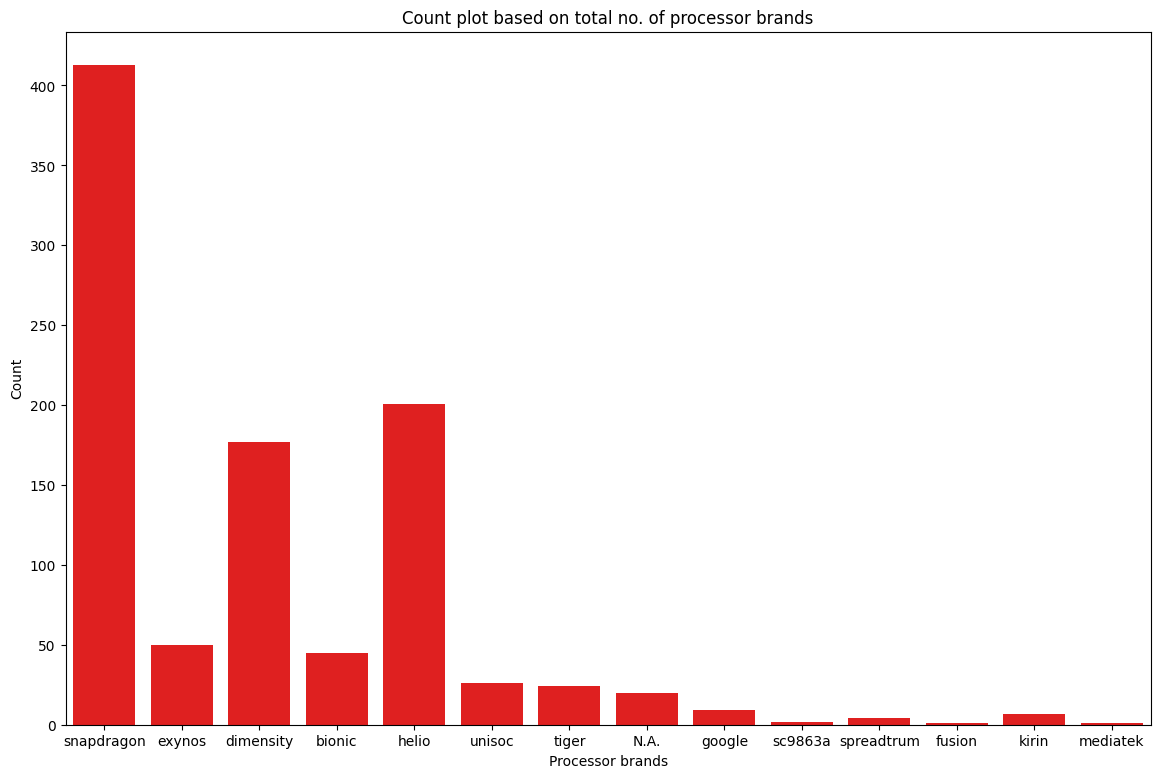

In [ ]:
# Count plot based on processor brands
plt.figure(figsize=(14, 9))
sns.countplot(data=df, x=df['processor_brand'], color='r')
plt.title('Count plot based on total no. of processor brands')
plt.xlabel('Processor brands')
plt.ylabel('Count')
plt.show()

In [ ]:
df = df.replace({True: 1, False: 0})

In [ ]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,1,1,0,snapdragon,8.0,3.2,...,6.70,120,3,1.0,android,50.0,16.0,0,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,1,0,0,snapdragon,8.0,2.2,...,6.59,120,3,1.0,android,64.0,16.0,1,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,1,0,0,exynos,8.0,2.4,...,6.60,90,3,1.0,android,50.0,13.0,1,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,1,0,0,snapdragon,8.0,2.2,...,6.55,120,3,1.0,android,50.0,16.0,1,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,1,0,0,dimensity,8.0,2.6,...,6.70,120,3,1.0,android,108.0,16.0,0,1080,2412


Classification prediction on 'has_5g' feature using Decision Tree Classifier

In [ ]:
y = df['has_5g']
y

0      1
1      1
2      1
3      1
4      1
      ..
975    1
976    1
977    1
978    1
979    1
Name: has_5g, Length: 980, dtype: int64

In [ ]:
x = df.drop(['has_5g'], axis=1)
x

,brand_name,model,price,rating,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,1,0,snapdragon,8.0,3.20,5000.0,...,6.70,120,3,1.0,android,50.0,16.0,0,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,0,0,snapdragon,8.0,2.20,5000.0,...,6.59,120,3,1.0,android,64.0,16.0,1,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,0,0,exynos,8.0,2.40,5000.0,...,6.60,90,3,1.0,android,50.0,13.0,1,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,0,0,snapdragon,8.0,2.20,5000.0,...,6.55,120,3,1.0,android,50.0,16.0,1,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,0,0,dimensity,8.0,2.60,5000.0,...,6.70,120,3,1.0,android,108.0,16.0,0,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,0,0,snapdragon,8.0,3.00,5000.0,...,6.67,120,3,1.0,android,64.0,16.0,0,1080,2460
976,honor,Honor X8 5G,14990,75.0,0,0,snapdragon,8.0,2.20,5000.0,...,6.50,60,3,1.0,android,48.0,8.0,1,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,1,1,dimensity,8.0,2.85,5080.0,...,6.60,144,3,1.0,android,64.0,16.0,0,1080,2460
978,motorola,Motorola Moto G91 5G,19990,80.0,1,0,snapdragon,8.0,2.20,5000.0,...,6.80,60,3,1.0,android,108.0,32.0,1,1080,2400


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Encode categorical columns' datas into binary (one-hot) encoded format
# Because AI model cannot directly handle categorical data, so we convert these categories into a numerical format.

encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder on the categorical columns and transform them into a new set of binary columns
x_encoded = encoder.fit_transform(x[obj_cols])

# Get the names of the new encoded columns
encoded_cols = encoder.get_feature_names_out(obj_cols)

In [ ]:
x_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
encoded_cols

array(['brand_name_apple', 'brand_name_asus', 'brand_name_blackview', ...,
       'os_android', 'os_ios', 'os_other'], dtype=object)

In [ ]:
# Create a dataframe with the encoded categorical features
x_encoded_df = pd.DataFrame(x_encoded, columns=encoded_cols)
x_encoded_df

,brand_name_apple,brand_name_asus,brand_name_blackview,brand_name_blu,brand_name_cat,brand_name_cola,brand_name_doogee,brand_name_duoqin,brand_name_gionee,brand_name_google,...,processor_brand_mediatek,processor_brand_sc9863a,processor_brand_snapdragon,processor_brand_spreadtrum,processor_brand_tiger,processor_brand_unisoc,os_N.A.,os_android,os_ios,os_other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
x_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Columns: 1044 entries, brand_name_apple to os_other
dtypes: float64(1044)
memory usage: 7.8 MB


In [ ]:
# Get feature dataframe without the categorical columns
x_num = x.drop(obj_cols, axis=1).reset_index(drop=True)
x_num

,price,rating,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height
0,54999,89.0,1,0,8.0,3.20,5000.0,1,12,256,6.70,120,3,1.0,50.0,16.0,0,1440,3216
1,19989,81.0,0,0,8.0,2.20,5000.0,1,6,128,6.59,120,3,1.0,64.0,16.0,1,1080,2412
2,16499,75.0,0,0,8.0,2.40,5000.0,1,4,64,6.60,90,3,1.0,50.0,13.0,1,1080,2408
3,14999,81.0,0,0,8.0,2.20,5000.0,1,6,128,6.55,120,3,1.0,50.0,16.0,1,1080,2400
4,24999,82.0,0,0,8.0,2.60,5000.0,1,6,128,6.70,120,3,1.0,108.0,16.0,0,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,34990,83.0,0,0,8.0,3.00,5000.0,1,8,128,6.67,120,3,1.0,64.0,16.0,0,1080,2460
976,14990,75.0,0,0,8.0,2.20,5000.0,1,6,128,6.50,60,3,1.0,48.0,8.0,1,720,1600
977,28990,85.0,1,1,8.0,2.85,5080.0,1,8,256,6.60,144,3,1.0,64.0,16.0,0,1080,2460
978,19990,80.0,1,0,8.0,2.20,5000.0,1,6,128,6.80,60,3,1.0,108.0,32.0,1,1080,2400


In [ ]:
# Combine the encoded categorical features and the original numeric features
x_final = pd.concat([x_encoded_df.reset_index(drop=True), x_num], axis=1)
x_final.head()

,brand_name_apple,brand_name_asus,brand_name_blackview,brand_name_blu,brand_name_cat,brand_name_cola,brand_name_doogee,brand_name_duoqin,brand_name_gionee,brand_name_google,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,256,6.70,120,3,1.0,50.0,16.0,0,1440,3216
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,128,6.59,120,3,1.0,64.0,16.0,1,1080,2412
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,64,6.60,90,3,1.0,50.0,13.0,1,1080,2408
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,128,6.55,120,3,1.0,50.0,16.0,1,1080,2400
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,128,6.70,120,3,1.0,108.0,16.0,0,1080,2412


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y, random_state=42, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
y_test.values

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9438775510204082


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[86,  7],
       [ 4, 99]])

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        93
           1       0.93      0.96      0.95       103

    accuracy                           0.94       196
   macro avg       0.94      0.94      0.94       196
weighted avg       0.94      0.94      0.94       196



In [ ]:
y_proba = model.predict_proba(x_test)[:, 1]

In [ ]:
fpr, tpr, thresh = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
roc_auc

0.942948115669694

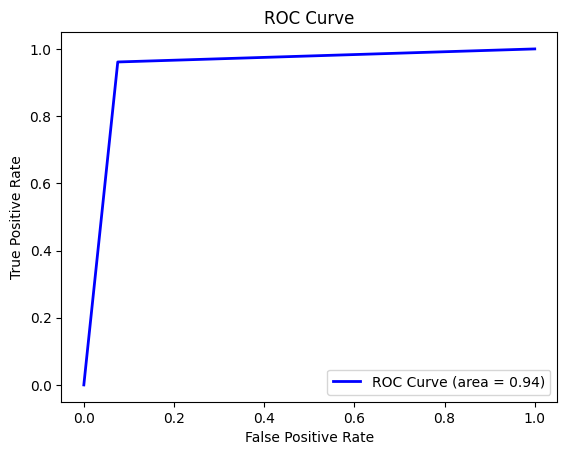

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='b', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Smartphone price prediction using Random Forest Regressor

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     980 non-null    float64
 4   has_5g                     980 non-null    int64  
 5   has_nfc                    980 non-null    int64  
 6   has_ir_blaster             980 non-null    int64  
 7   processor_brand            980 non-null    object 
 8   num_cores                  980 non-null    float64
 9   processor_speed            980 non-null    float64
 10  battery_capacity           980 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  ram_capacity               980 non-null    int64  
 13  internal_memory            980 non-null    int64  

In [ ]:
obj_cols

Index(['brand_name', 'model', 'processor_brand', 'os'], dtype='object')

In [ ]:
# Columns to be removed from the original dataset
cols_removed = obj_cols
cols_removed = cols_removed.append(pd.Index(['rating']))
cols_removed

Index(['brand_name', 'model', 'processor_brand', 'os', 'rating'], dtype='object')

In [ ]:
df1 = df.drop(columns=cols_removed, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      980 non-null    int64  
 1   has_5g                     980 non-null    int64  
 2   has_nfc                    980 non-null    int64  
 3   has_ir_blaster             980 non-null    int64  
 4   num_cores                  980 non-null    float64
 5   processor_speed            980 non-null    float64
 6   battery_capacity           980 non-null    float64
 7   fast_charging_available    980 non-null    int64  
 8   ram_capacity               980 non-null    int64  
 9   internal_memory            980 non-null    int64  
 10  screen_size                980 non-null    float64
 11  refresh_rate               980 non-null    int64  
 12  num_rear_cameras           980 non-null    int64  
 13  num_front_cameras          980 non-null    float64

In [ ]:
y = df1['price']
y.head()

0    54999
1    19989
2    16499
3    14999
4    24999
Name: price, dtype: int64

In [ ]:
x = df1.drop(['price'], axis=1)
x.head()

,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height
0,1,1,0,8.0,3.2,5000.0,1,12,256,6.70,120,3,1.0,50.0,16.0,0,1440,3216
1,1,0,0,8.0,2.2,5000.0,1,6,128,6.59,120,3,1.0,64.0,16.0,1,1080,2412
2,1,0,0,8.0,2.4,5000.0,1,4,64,6.60,90,3,1.0,50.0,13.0,1,1080,2408
3,1,0,0,8.0,2.2,5000.0,1,6,128,6.55,120,3,1.0,50.0,16.0,1,1080,2400
4,1,0,0,8.0,2.6,5000.0,1,6,128,6.70,120,3,1.0,108.0,16.0,0,1080,2412


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([102638.09      ,  17495.42      ,  26271.47      ,  11937.56      ,
        51798.53      ,  18462.53666667,  21860.49333333,  95002.55      ,
        11130.8452381 ,  14168.1875    ,  15583.58      ,  32647.83      ,
        12750.75      ,  18375.01      ,  15160.24      ,  23249.44      ,
       100002.9       ,  11787.8       ,  45633.425     ,  41486.89      ,
        31973.3       ,  13689.59      ,  35104.72      ,   8797.52      ,
        43040.82      ,  17106.05      ,  49783.135     ,  28445.58      ,
         9316.99      ,  81182.51      ,  14370.04833333,  20262.36333333,
        19539.52333333,  60470.63333333,   8578.8       ,  25784.36      ,
        15753.43416667,  61864.60333333,  21277.4       ,   9089.41      ,
        13227.79      ,  17508.99      ,  18406.75      ,  59080.9725    ,
        65963.47      ,  15361.49666667,  13474.2875    ,  44167.95      ,
        41724.50333333,  11215.365     ,  12819.72166667,  17433.92      ,
        33821.66      ,  

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   has_5g                     980 non-null    int64  
 1   has_nfc                    980 non-null    int64  
 2   has_ir_blaster             980 non-null    int64  
 3   num_cores                  980 non-null    float64
 4   processor_speed            980 non-null    float64
 5   battery_capacity           980 non-null    float64
 6   fast_charging_available    980 non-null    int64  
 7   ram_capacity               980 non-null    int64  
 8   internal_memory            980 non-null    int64  
 9   screen_size                980 non-null    float64
 10  refresh_rate               980 non-null    int64  
 11  num_rear_cameras           980 non-null    int64  
 12  num_front_cameras          980 non-null    float64
 13  primary_camera_rear        980 non-null    float64

In [ ]:
has_5g = 1
has_nfc = 1
has_ir_blaster = 0
num_cores = 8.0
processor_speed = 2.4
battery_capacity = 6000.0
fast_charging_available = 0
ram_capacity = 8
internal_memory = 128
screen_size = 6.5
refresh_rate = 120
num_rear_cameras = 3
num_front_cameras = 1.0
primary_camera_rear = 50.0
primary_camera_front = 13.0
extended_memory_available = 1
resolution_width = 1080
resolution_height = 2340

input_data = [has_5g, has_nfc, has_ir_blaster, num_cores, processor_speed, battery_capacity, fast_charging_available,
              ram_capacity, internal_memory, screen_size, refresh_rate, num_rear_cameras, num_front_cameras, primary_camera_rear,
              primary_camera_front, extended_memory_available, resolution_width, resolution_height]

In [ ]:
pred_price = model.predict([input_data])[0]
print('Predicted price: {:.2f}' . format(pred_price))

Predicted price: 20202.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
mse = mean_squared_error(y_test, y_pred)
acc = r2_score(y_test, y_pred)
print('Mean Squared Error: ', mse)
print('R2 Score: ', acc)

Mean Squared Error:  220949066.55644357
R2 Score:  0.7693252054302483
